In [132]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pylab as plt

pd.options.display.max_columns = 50
pd.options.display.max_rows = 200

In [101]:
FILE_USERS = 'dataset/takehome_users.csv'
FILE_USER_ENGAGEMENT = 'dataset/takehome_user_engagement.csv'

In [102]:
df_users = pd.read_csv(FILE_USERS, encoding = "ISO-8859-1")
df_user_engagement = pd.read_csv(FILE_USER_ENGAGEMENT, encoding = "ISO-8859-1")

In [103]:
def show_info(df):
    display("----- info -----")
    display(df.info())
    display("----- columns -----")
    display(df.columns)
    display("----- describe -----")
    display(df.describe())
    display("----- head -----")
    display(df.head())

In [104]:
show_info(df_users)

'----- info -----'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


None

'----- columns -----'

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

'----- describe -----'

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


'----- head -----'

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [105]:
show_info(df_user_engagement)

'----- info -----'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


None

'----- columns -----'

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

'----- describe -----'

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


'----- head -----'

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Defining "adopted user"

In [106]:
df_user_engagement['time_stamp'] = pd.to_datetime(df_user_engagement['time_stamp'])

In [107]:
display(df_user_engagement['time_stamp'][1])
display(df_user_engagement['time_stamp'][4])
display((df_user_engagement['time_stamp'][4] - df_user_engagement['time_stamp'][1]).days)

Timestamp('2013-11-15 03:45:04')

Timestamp('2013-12-25 03:45:04')

40

In [108]:
def label_adopted(series):
    if len(series) < 3:
        return 0
    sorted_series = sorted(series)
    for i in range(len(sorted_series)-2): 
        if (sorted_series[i+2] - sorted_series[i]).days <= 7:
            return 1
    return 0

In [109]:
df_user_adopted = df_user_engagement.groupby('user_id', as_index=False).agg({'time_stamp': label_adopted, 'visited': np.sum})
df_user_adopted = df_user_adopted.rename(columns={'time_stamp': 'adopted'})

In [110]:
show_info(df_user_adopted)

'----- info -----'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 3 columns):
user_id    8823 non-null int64
adopted    8823 non-null int64
visited    8823 non-null int64
dtypes: int64(3)
memory usage: 275.7 KB


None

'----- columns -----'

Index(['user_id', 'adopted', 'visited'], dtype='object')

'----- describe -----'

,user_id,adopted,visited
count,8823.000000,8823.000000,8823.000000
mean,6019.821716,0.187691,23.565341
std,3464.251001,0.390488,73.988152
min,1.000000,0.000000,1.000000
25%,3017.500000,0.000000,1.000000
50%,6034.000000,0.000000,1.000000
75%,9029.500000,0.000000,3.000000
max,12000.000000,1.000000,606.000000


'----- head -----'

,user_id,adopted,visited
0,1,0,1
1,2,1,14
2,3,0,1
3,4,0,1
4,5,0,1


## Data wrangling

In [111]:
df_users_clean = df_users.drop('creation_time', axis=1)
del df_users_clean['name']
del df_users_clean['email']
del df_users_clean['last_session_creation_time']

In [112]:
df_users_adopted = pd.merge(df_users_clean, df_user_adopted, left_on='object_id', right_on='user_id', how='left')
df_users_adopted['adopted'] = df_users_adopted['adopted'].fillna(0)
del df_users_adopted['user_id']
del df_users_adopted['visited']

In [113]:
df_users_adopted.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,GUEST_INVITE,1,0,11,10803.0,0.0
1,2,ORG_INVITE,0,0,1,316.0,1.0
2,3,ORG_INVITE,0,0,94,1525.0,0.0
3,4,GUEST_INVITE,0,0,1,5151.0,0.0
4,5,GUEST_INVITE,0,0,193,5240.0,0.0


In [114]:
# count the number of invitations

df_invitations = pd.DataFrame()
df_invitations['invited_by_user_id'] = df_users['invited_by_user_id'].dropna().astype(int)
df_invitations['invitation_count'] = 1
df_invitation_count = df_invitations.groupby('invited_by_user_id', as_index=False).sum()
display(df_invitation_count.head())

,invited_by_user_id,invitation_count
0,3,1
1,7,5
2,10,1
3,21,1
4,23,3


In [115]:
df_users_invitation = pd.merge(df_users_adopted, df_invitation_count, left_on='object_id', right_on='invited_by_user_id', how='left')
del df_users_invitation['invited_by_user_id_x']
del df_users_invitation['invited_by_user_id_y']
df_users_invitation['invitation_count'] = df_users_invitation['invitation_count'].fillna(0)
display(df_users_invitation.head())

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invitation_count
0,1,GUEST_INVITE,1,0,11,0.0,0.0
1,2,ORG_INVITE,0,0,1,1.0,0.0
2,3,ORG_INVITE,0,0,94,0.0,1.0
3,4,GUEST_INVITE,0,0,1,0.0,0.0
4,5,GUEST_INVITE,0,0,193,0.0,0.0


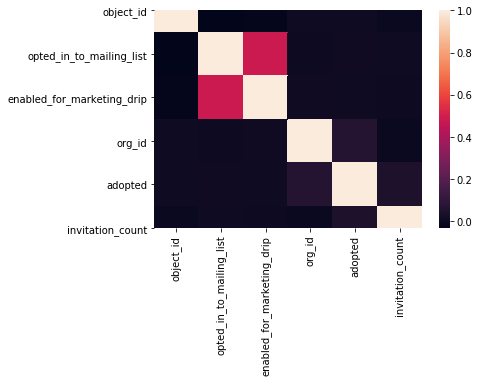

In [116]:
corr = df_users_invitation.corr()
ax = sns.heatmap(corr)
plt.show()

In [117]:
corr['adopted'].sort_values(ascending=False)

adopted                       1.000000
org_id                        0.066995
invitation_count              0.044453
opted_in_to_mailing_list      0.008838
enabled_for_marketing_drip    0.006578
object_id                     0.005292
Name: adopted, dtype: float64

One-hot-encoding

In [118]:
df_users_train = pd.get_dummies(df_users_invitation, columns=['creation_source', 'org_id'])

In [119]:
show_info(df_users_train)

'----- info -----'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Columns: 427 entries, object_id to org_id_416
dtypes: float64(2), int64(3), uint8(422)
memory usage: 5.4 MB


None

'----- columns -----'

Index(['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'adopted', 'invitation_count', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       ...
       'org_id_407', 'org_id_408', 'org_id_409', 'org_id_410', 'org_id_411',
       'org_id_412', 'org_id_413', 'org_id_414', 'org_id_415', 'org_id_416'],
      dtype='object', length=427)

'----- describe -----'

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,invitation_count,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,org_id_2,org_id_3,org_id_4,org_id_5,org_id_6,org_id_7,org_id_8,org_id_9,org_id_10,org_id_11,org_id_12,org_id_13,org_id_14,...,org_id_392,org_id_393,org_id_394,org_id_395,org_id_396,org_id_397,org_id_398,org_id_399,org_id_400,org_id_401,org_id_402,org_id_403,org_id_404,org_id_405,org_id_406,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.249500,0.149333,0.138000,0.534750,0.180250,0.354500,0.175917,0.173917,0.115417,0.026583,0.019417,0.016750,0.014000,0.013250,0.010667,0.011500,0.009917,0.008083,0.010333,0.008667,0.006250,0.006250,0.00600,0.007250,...,0.001333,0.001250,0.001833,0.000750,0.000750,0.000667,0.001500,0.001083,0.000667,0.001583,0.001167,0.001083,0.001083,0.001000,0.001917,0.001000,0.001500,0.001417,0.001083,0.002167,0.001417,0.001333,0.001667,0.001333,0.000167
std,3464.24595,0.432742,0.356432,0.344914,1.350473,0.384412,0.478381,0.380765,0.379054,0.319537,0.160869,0.137990,0.128339,0.117495,0.114348,0.102732,0.106624,0.099092,0.089547,0.101131,0.092695,0.078813,0.078813,0.07723,0.084841,...,0.036492,0.035335,0.042780,0.027377,0.027377,0.025812,0.038702,0.032898,0.025812,0.039761,0.034138,0.032898,0.032898,0.031608,0.043740,0.031608,0.038702,0.037614,0.032898,0.046499,0.037614,0.036492,0.040792,0.036492,0.012909
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6000.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9000.25000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

'----- head -----'

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,invitation_count,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,org_id_2,org_id_3,org_id_4,org_id_5,org_id_6,org_id_7,org_id_8,org_id_9,org_id_10,org_id_11,org_id_12,org_id_13,org_id_14,...,org_id_392,org_id_393,org_id_394,org_id_395,org_id_396,org_id_397,org_id_398,org_id_399,org_id_400,org_id_401,org_id_402,org_id_403,org_id_404,org_id_405,org_id_406,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,1,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Training

In [120]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, r2_score

In [122]:
df_train = df_users_train.drop(['object_id'], axis=1)
X = df_train.drop(['adopted'], axis=1)
y = df_train['adopted']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=0, stratify=y)

In [123]:
def train_and_score(clf, params):
    if params == None:
        cv = clf
    else:
        cv = GridSearchCV(clf, params, n_jobs=-1, cv=3, iid=False)
    %time cv.fit(X_train, y_train)
    y_pred = cv.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    display('best score:{}'.format(cv.best_score_ if hasattr(cv, 'best_score_') else None))
    display('best params:{}'.format(cv.best_params_ if hasattr(cv, 'best_params_') else None))
    display('acc:{}'.format(acc))

In [124]:
from xgboost.sklearn import XGBClassifier

In [136]:
clf_xgb = XGBClassifier(max_delta_step=0.1, seed=0)
param_grid_xgb = {
    'n_estimetors': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [3, 5, 10],
    'colsample_bytree': [0.8, 0.9],
    'colsample_bylevel': [0.8, 0.9],
    'reg_alpha': [0, 0.1]
}
train_and_score(clf_xgb, param_grid_xgb)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 22 s, sys: 5.32 s, total: 27.3 s
Wall time: 52min 4s


'best score:0.8620238403030894'

"best params:{'colsample_bylevel': 0.8, 'colsample_bytree': 0.8, 'max_depth': 3, 'min_child_weight': 5, 'n_estimetors': 100, 'reg_alpha': 0}"

'acc:0.8619444444444444'

In [142]:
clf_xgb_best = XGBClassifier(
    n_estimetors=100, 
    max_delta_step=0.1, 
    seed=0,
    colsample_bylevel=0.8,
    colsample_bytree=0.8,
    max_depth=3,
    min_child_weight=5,
    reg_alpha=0)
%time clf_xgb_best.fit(X_train, y_train)

CPU times: user 4.18 s, sys: 80 ms, total: 4.26 s
Wall time: 4.31 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0.1, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100,
              n_estimetors=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=1, verbosity=1)

In [143]:
df_importances_xgb = pd.DataFrame(clf_xgb_best.feature_importances_, index=X.columns, columns=['importance'])
df_importances_xgb.sort_values(by='importance', ascending=False)

,importance
org_id_218,0.547364
org_id_72,0.452636
org_id_272,0.000000
org_id_283,0.000000
org_id_282,0.000000
...,...
org_id_131,0.000000
org_id_130,0.000000
org_id_129,0.000000
org_id_128,0.000000


In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
clf_rf = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [50, 100],
    'criterion': ["gini", "entropy"],
    'max_depth': [5, 20, None],
    'max_features': [1, 5, 'sqrt', 'log2', None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 5],
}
train_and_score(clf_rf, param_grid_rf)

CPU times: user 7.63 s, sys: 1.59 s, total: 9.22 s
Wall time: 1h 45min 39s


'best score:0.8620238403030894'

"best params:{'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}"

'acc:0.8619444444444444'